In [1]:
import os
import sys
import networkx as nx
import random
import numpy as np
import os
from NCPNet.brain_data import Celegans19
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import yaml
import math



In [2]:
def to_networkx(data, weight=None,to_undirected=False,remove_self_loops=False):
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    to_undirected = "upper" if to_undirected is True else to_undirected
    to_undirected_upper = True if to_undirected == "upper" else False
    to_undirected_lower = True if to_undirected == "lower" else False
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
    
        if to_undirected_upper and u > v:
            continue
        elif to_undirected_lower and u < v:
            continue

        if remove_self_loops and u == v:
            continue

        G.add_edge(u, v)

        if weight is not None:
            G[u][v]['weight'] = weight[i]
    num_nodes=data.num_nodes
    for i in range(num_nodes):
        if i not in G.nodes:

            G.add_node(i)


    return G
    


In [3]:
wormdata='.'
worm=Celegans19(wormdata)

G=to_networkx(worm.data)
label=worm.data.y.cpu().numpy().T


In [4]:
pos=nx.nx_pydot.graphviz_layout(G)

598


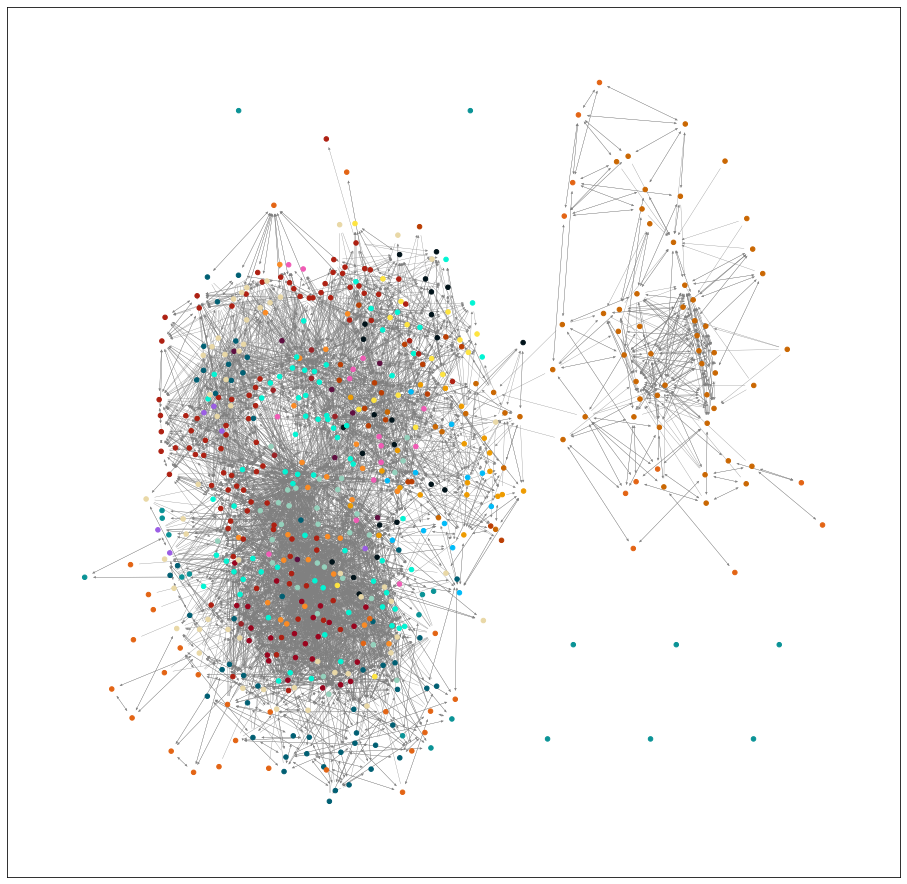

In [5]:
print(len(label))
colors=['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']+['#9b5de5', '#f15bb5', '#fee440', '#00bbf9', '#00f5d4']+['#5f0f40', '#9a031e', '#fb8b24', '#e36414', '#0f4c5c']

color_dict={k:c for k,c in enumerate(colors)}
ccc=[]

for l in label:
    g=l%19
    if g in color_dict:
        ccc.append(color_dict[g])
    else:
        ccc.append('grey')
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(16,16))
nx.draw_networkx_nodes(G,pos=pos,node_color=ccc,ax=ax,node_size=20)
nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color='grey',width=0.3,arrowsize=5)
fig.savefig(os.path.join(work_dir,'Plot_figure/Appendix','S_Figure2.eps'))


In [6]:
from torch_geometric.utils import to_dense_adj
def get_ticks(types: list):
    loc=[0]
    ticks=[]
    last=types[0]
    for k,i in enumerate(types):
        if i!=last:
            loc.append(k)
        last=i
        if i not in ticks:
            ticks.append(i)
    
    loc.append(len(types))
    res_loc=[]
    print(loc)
    last=loc[0]
    for k,i in enumerate(loc[1:]):
        res_loc.append((last+i)/2)
        last=i
    assert len(res_loc)==len(ticks)
    return res_loc,ticks
adj=to_dense_adj(worm.data.edge_index)[0]
mat=adj.cpu().numpy()


[0, 61, 81, 85, 97, 112, 118, 144, 152, 183, 208, 225, 243, 262, 333, 428, 449, 455, 507, 539, 578, 598]


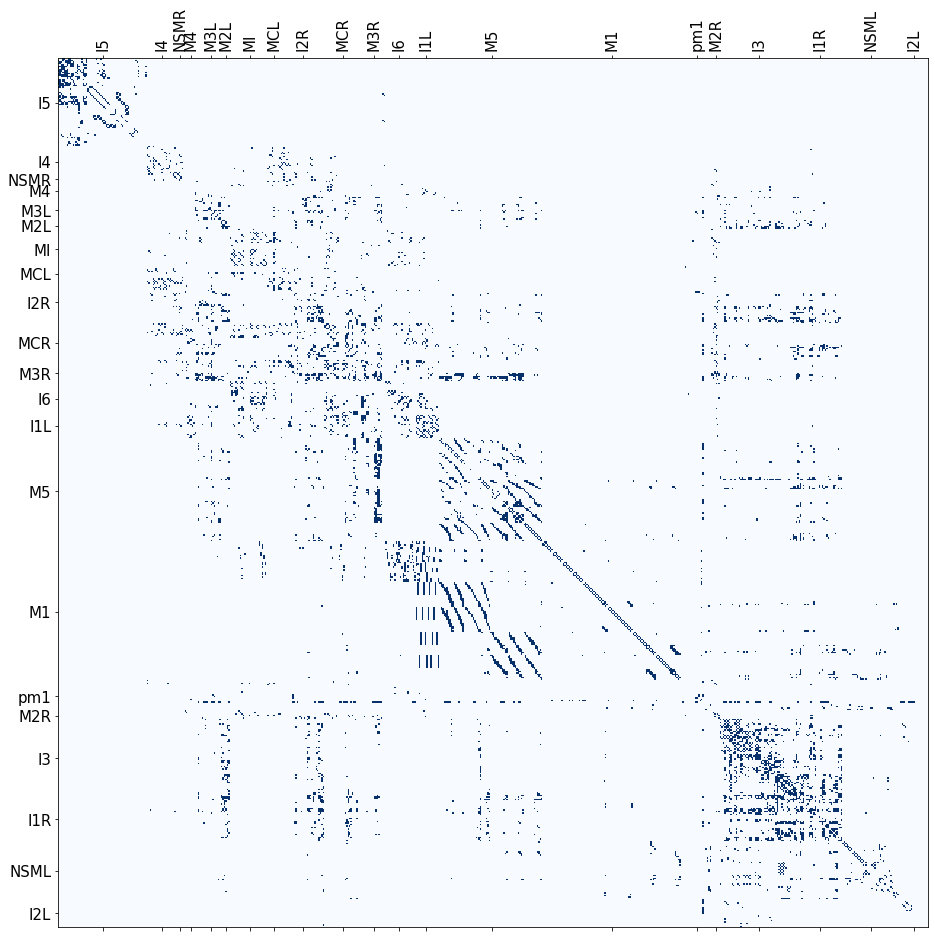

In [22]:
cmp='Blues'
fig,ax=plt.subplots(1,1,figsize=(16,16))

labelid2label={v:k for k,v in worm.label2ID.items()}
strlabel=[labelid2label[i] for i in label]
loc,ticks=get_ticks(strlabel)
ax.matshow(mat,vmin=0,vmax=1,cmap=cmp)
ax.set_xticks(loc,labels=ticks,rotation=90,size=15)
ax.set_yticks(loc,labels=ticks,size=15)
fig.savefig(os.path.join(work_dir,'worm_adj.eps'))